## Example CMB likelihood code

In [1]:
import matplotlib.pyplot as plt
from tools.cmb import CMB
import numpy as np

With the code we can build a likelihood function for the planck data and an estimate of the planck noise.

In [2]:
# the generator
cmb_generator = CMB()

# planck best fit paraemters
theta = [0.022, 0.12, 1.04, 0.06, 0.96, 3.0]
# get the planck data
planck, l = cmb_generator.get_planck()
# get an estimate of the planck instrument noise
noise = cmb_generator.get_planck_noise(l)
# build the likelihood function with planck data
likelihood = cmb_generator.get_likelihood(planck, l, noise)
# evaluate planck likelihood at the planck best fit parameters
print(likelihood(theta))


(317.8217745172588, [])


/Users/harrybevins/Documents/Current-projects/cmb-likelihood/tools/cmb.py:78: RuntimeWarning: divide by zero encountered in divide
  cl *= (2*np.pi)/(np.arange(len(cl))*(np.arange(len(cl))+1)) # convert to C_l
/Users/harrybevins/Documents/Current-projects/cmb-likelihood/tools/cmb.py:78: RuntimeWarning: invalid value encountered in multiply
  cl *= (2*np.pi)/(np.arange(len(cl))*(np.arange(len(cl))+1)) # convert to C_l


We can also calculate the theoretical model corresponding to Planck best fit parameters (using CAMB) and plot this.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

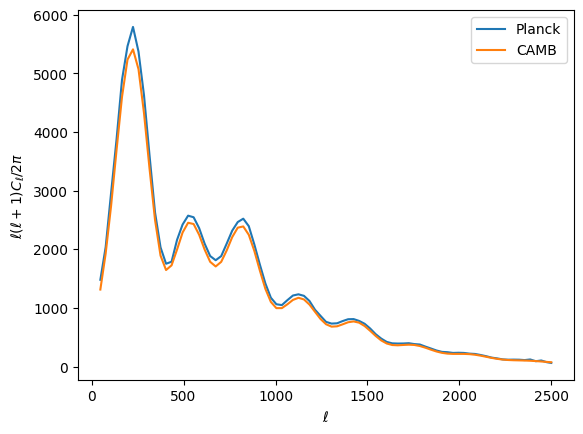

In [3]:
model = cmb_generator.get_camb_model(theta)
model = np.interp(l, np.arange(len(model)), model)

plt.plot(l, planck*(l*(l+1)/(2*np.pi)), label='Planck')
plt.plot(l, model*(l*(l+1)/(2*np.pi)), label='CAMB')

plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')


Next, we can generate a set of parameters from a prior distribution and evaluate their likelihoods with respect to the Planck data.

In [4]:
thetas = np.vstack([cmb_generator.prior(np.random.uniform(0, 1, 6)) for i in range(10)])
likelihoods = [likelihood(t) for t in thetas]
print(likelihoods)

[(-17058.812962339725, []), (-19747.339713537745, []), (-3584.7896277531395, []), (-127771.03225230853, []), (-264858.4426282799, []), (-11293.156610365157, []), (-4518.486419049387, []), (-192178.99008860017, []), (-702949.4620672474, []), (-64215.158241899466, [])]


Finally we can generate noisy data. The function `get_samples` produces an observation of a theoretical signal with parameters `theta` from an instrument with `noise`.

(10, 83)
(10, 83)


Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

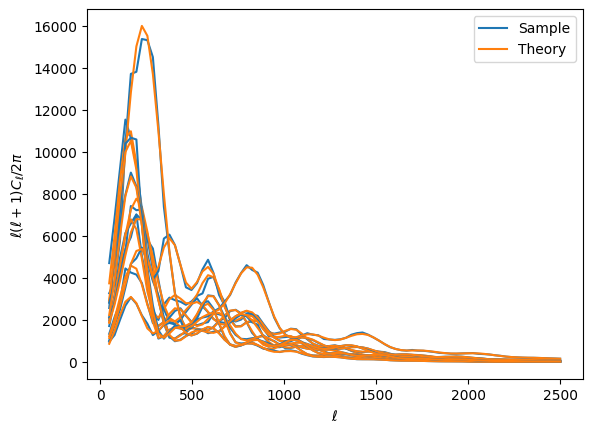

In [5]:
s = np.array([cmb_generator.get_samples(l, t, noise) for t in thetas])

theory = s[:, 0, :]
sample = s[:, 1, :]
print(theory.shape)
print(sample.shape)
for i in range(len(sample)):
    plt.plot(l, sample[i]*(l*(l+1)/(2*np.pi)), c='C0')
    plt.plot(l, theory[i]*(l*(l+1)/(2*np.pi)), c='C1')
plt.legend(['Sample', 'Theory'])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')


[2266.61448 1739.13348 1394.51256  989.538    716.14746]


Text(0, 0.5, '$\\ell(\\ell+1)N_\\ell/2\\pi$')

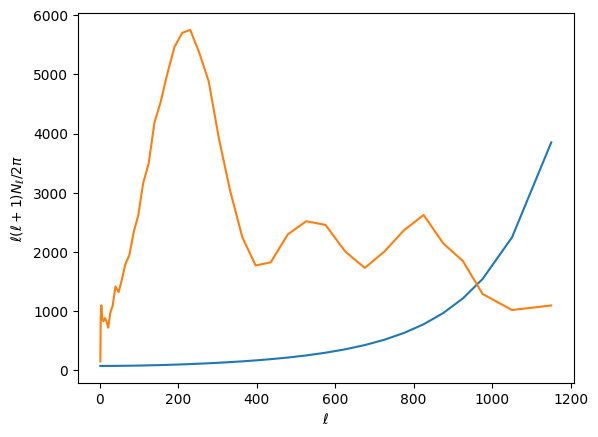

In [19]:
wmap_theta = np.array([0.82, 0.62, 0.49, 0.33, 0.21]) # in degrees
#wmap_noise = wmap_theta* np.array([1.014, 1.029, 1.044, 1.100, 1.251])*2.726*1e3
wmap_noise = np.array([35, 35, 35, 35, 35])*(0.3*0.3)
print(wmap_noise)

# nine year binned wmap data
wmap = np.loadtxt('wmap_binned.txt')
l = wmap[:, 0]

wmap_theta *= np.pi/180 # convert to radians
wmap_noise *= np.pi/180 # convert to radians


nis = []
for i in range(len(wmap_noise)):
    ninst = wmap_noise[i]**2 * \
        np.exp(l*(l+1)*wmap_theta[i]**2/(8*np.log(2))) #one over ninst
    nis.append(1/ninst)
ninst = np.array(nis).T
ninst = np.sum(ninst, axis=1)
wnoise = 1/ninst

# nine year binned wmap data
wmap = np.loadtxt('wmap_binned.txt')

plt.plot(l, wnoise)
plt.plot(wmap[:, 0], wmap[:, 3])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)N_\ell/2\pi$')

